<a href="https://colab.research.google.com/github/flediak/Euclid_IA_KP_paper0/blob/main/notebooks/plots_lowz_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install latex

In [20]:
!apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [3]:
def flux2mag (f):
    return -2.5 * np.log10(f) - 48.6

In [4]:
# LOWZ main sample selection

# download lowz samples from boss and flagship 2


In [5]:
!gdown 1YBUVlA62p6qfVcUxpUSng2Ij8HcyH5Ca
!gdown 1AJTibkYb3GifKG99JSmQIt7wPcT6jejf

!gdown 16lpCCehbvv3-gG_GEC2ell85qdSjQ-Xy
!gdown 1QkXfxYG2oHFbxtA6y22aj03-2QE0qA6n

Downloading...
From: https://drive.google.com/uc?id=1YBUVlA62p6qfVcUxpUSng2Ij8HcyH5Ca
To: /content/lowz_fs2.csv.bz2
100% 26.8M/26.8M [00:00<00:00, 52.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AJTibkYb3GifKG99JSmQIt7wPcT6jejf
To: /content/lowz_fs2_nozcut.csv.bz2
100% 39.3M/39.3M [00:00<00:00, 50.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=16lpCCehbvv3-gG_GEC2ell85qdSjQ-Xy
To: /content/lowz_boss_dr11.csv.bz2
100% 55.5M/55.5M [00:01<00:00, 46.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QkXfxYG2oHFbxtA6y22aj03-2QE0qA6n
To: /content/lowz_boss_dr12.csv.bz2
100% 12.2M/12.2M [00:00<00:00, 15.5MB/s]


In [6]:
data_fs2 = pd.read_csv('lowz_fs2_nozcut.csv.bz2')

In [7]:
data_boss_dr11 = pd.read_csv('lowz_boss_dr11.csv.bz2')
data_boss_dr12 = pd.read_csv('lowz_boss_dr12.csv.bz2')

# compare number densities: FS2 vs. observations


In [8]:
# redshift limits used by Singh&Mandelbum 2016
z_min_lowz, z_max_lowz =  0.16, 0.36#

In [9]:
#==== BOSS LOWZ DR12 =====
A_boss_used_dr12 = 8579. # "used" area from Reid16 table 2
A_boss_eff_dr12 = 8337. # "effective" area from Reid16 table 2

#redshift selection
select_zrange = (z_min_lowz < data_boss_dr12.redshift) & (data_boss_dr12.redshift < z_max_lowz)

Ng_boss_dr12 = len(data_boss_dr12[select_zrange])

ng_boss_used_dr12 = Ng_boss_dr12 / A_boss_used_dr12
ng_boss_eff_dr12 = Ng_boss_dr12 / A_boss_eff_dr12

#==== Flagship 2 =====
A_oct = 5156.62 # 1 octant in deg^2

#redshift selection
select_zrange = (z_min_lowz < data_fs2.observed_redshift_gal) &  (data_fs2.observed_redshift_gal < z_max_lowz)

Ng_fs2 = len(data_fs2[select_zrange])

ng_fs2 = Ng_fs2 / A_oct

#compare numbers
print('area:')
print('BOSS LOWZ dr12 (used): ',A_boss_used_dr12,'deg^2')
print('BOSS LOWZ dr12 (effective): ',A_boss_eff_dr12,'deg^2')
print('area FS2: ',A_oct,'deg^2 (1 octant)')

print('\nNgal:')
print('BOSS LOWZ dr12: ',Ng_boss_dr12)
print('FS2: ',Ng_fs2)

print('\nNgal/area:')
print('BOSS LOWZ dr12 (used): ',ng_boss_used_dr12)
print('BOSS LOWZ dr12 (effective): ',ng_boss_eff_dr12)
print('FS2: ',ng_fs2)

area:
BOSS LOWZ dr12 (used):  8579.0 deg^2
BOSS LOWZ dr12 (effective):  8337.0 deg^2
area FS2:  5156.62 deg^2 (1 octant)

Ngal:
BOSS LOWZ dr12:  249938
FS2:  155179

Ngal/area:
BOSS LOWZ dr12 (used):  29.133698566266464
BOSS LOWZ dr12 (effective):  29.979369077605853
FS2:  30.09316179978358


# plot redshift distribution

In [66]:
fname_plot = 'zpdf_lowz_boss_vs_fs2.pdf'

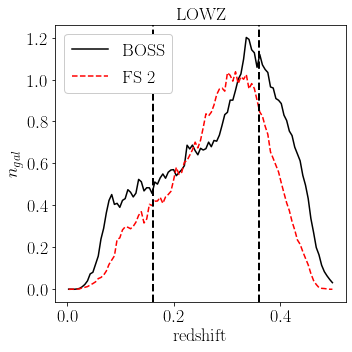

In [81]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

fontsize=18

z_bins = np.linspace(0.08,0.35,100)

#========== red+blue ==========
ax.set_title('LOWZ', fontsize=fontsize)

zbins = np.linspace(0,0.5,100)

#boss dr12
counts, bins_edges = np.histogram(data_boss_dr12.redshift, bins=zbins)
bin_centers = (bins_edges[1:] + bins_edges[:-1])*0.5
ax.plot(bin_centers, counts/A_boss_eff_dr12, label='BOSS', color='k', ls='-')

#boss dr11
#counts, bins_edges = np.histogram(data_boss_dr11.redshift, bins=zbins)
#bin_centers = (bins_edges[1:] + bins_edges[:-1])*0.5
#ax.plot(bin_centers, counts/(A_boss_eff_dr12*0.87), label='BOSS  DR11', color='green', ls=':')

#flagship
counts, bins_edges = np.histogram(data_fs2.observed_redshift_gal, bins=zbins)
bin_centers = (bins_edges[1:] + bins_edges[:-1])*0.5
ax.plot(bin_centers, counts/A_oct, label='FS 2', color='r', ls='--')

#ax.set_xlim(0.06,0.32)
ax.set_xlabel('redshift', fontsize=fontsize)
ax.set_xlabel('redshift', fontsize=fontsize)
ax.set_xlabel('redshift', fontsize=fontsize)
ax.set_ylabel('$n_{gal}$', fontsize=fontsize)

#plot limits used in anaysis
ax.axvline(x=z_min_lowz, linestyle='--',lw=2, c='black')
ax.axvline(x=z_max_lowz, linestyle='--',lw=2, c='black')

ax.legend(loc = 'upper left', fontsize=fontsize,framealpha=1.0)
    

plt.savefig(fname_plot)

plt.tight_layout()
plt.show()

In [82]:
#download plot
files.download(fname_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### plot $m_r$, $C_{\parallel}$ and $C_\perp$ distributions

In [83]:
def cpar_cut(cpar, c):
    return 13.5 + cpar/0.3 + c

In [84]:
dr_fs2_lowz = -0.17# matched number density to obs, but too low clustering..

In [85]:
fname_plot = 'lowz_cuts_boss_fs2.png'

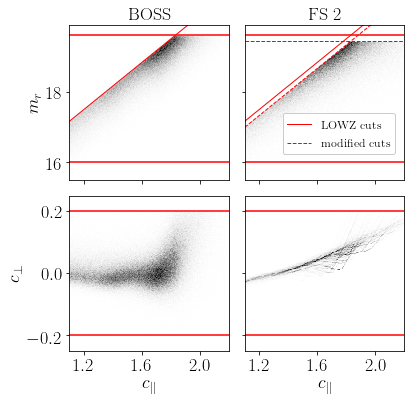

In [86]:
fig, ax = plt.subplots(2,2, figsize=(6,6), sharey='row', sharex='col')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

fontsize=18

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

z_bins = np.linspace(0,1.45, 50)
m_bins = np.linspace(6.5,11.5, 50)

Aused = 7562. #(used BOSS DR11 area, weighted by CBOSS)
A_oct = 5156.62 # 1 octant in deg^2
fA= (Aused / A_oct)

Nmin, Nmax = 0, 200
cpar_bins = np.linspace(1.1, 2.2, 200)
r_bins = np.linspace(15.5, 19.9, 200)
cm_bins = [cpar_bins, r_bins]

#======== cpar - mr =========
iy=0

ax[iy,1].hist2d(data_fs2.cpar, data_fs2.sdss_r_app_mag, bins=cm_bins, cmap='Greys', density=True)
Nmin, Nmax = Nmin*fA, Nmax*fA
ax[iy,0].hist2d(data_boss_dr11.cpar, data_boss_dr11.m_r, bins=cm_bins, cmap='Greys', density=True)

for ix in range(2):
    
    ax[iy,ix].axhline(y=19.6,c='r')
    ax[iy,ix].axhline(y=16.0,c='r')

    ax[iy,ix].plot(cpar_bins, cpar_cut(cpar_bins,0), c='r', linewidth=1, label='LOWZ cuts')

    ax[1,ix].set_xlabel('$c_{\parallel}$', fontsize=fontsize)

ax[0,0].set_ylabel('$m_r$', fontsize=fontsize)

ax[iy,1].plot(cpar_bins, cpar_cut(cpar_bins,dr_fs2_lowz), c='r', linewidth=1, linestyle = "--", label='modified cuts')
ax[iy,1].axhline(y=19.6+dr_fs2_lowz,c='r', linewidth=1, linestyle = "--")

ax[0,1].set_title('FS 2', fontsize=fontsize)
ax[0,0].set_title('BOSS', fontsize=fontsize)

#======== cpar - cperp =========
iy=1

cperp_bins = np.linspace(-0.25, 0.25, 200)
cc_bins = [cpar_bins, cperp_bins]

ax[iy,1].hist2d(data_fs2.cpar, data_fs2.cperp, bins = cc_bins, cmap='Greys', density=True)
ax[iy,0].hist2d(data_boss_dr11.cpar, data_boss_dr11.cperp, bins= cc_bins, cmap='Greys', density=True)


for ix in range(2):

    ax[iy,ix].axhline(y=0.2,c='r')
    ax[iy,ix].axhline(y=-0.2,c='r')


ax[iy,0].set_ylabel('$c_{\perp}$', fontsize=fontsize)


for ix in range(2):
  ax[-1,ix].set_xticks(np.arange(0, 4, step=0.4))

for ix in range(2):
  for iy in range(2):
    ax[iy,ix].set_xlim(cpar_bins.min(), cpar_bins.max())

#ax[0,0].legend(loc='lower right', fontsize=fontsize)
ax[0,1].legend(bbox_to_anchor=(0.2, 0.3), fontsize=12,framealpha=1.0)

plt.savefig(fname_plot, dpi=400)

plt.show()

In [87]:
# download plot
files.download(fname_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>